In [26]:
import pandas as pd

In [31]:
df = pd.read_csv("../data/fake_job_postings.csv")
print(df.shape)
print(df.columns)
df.head()


(17880, 18)
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [32]:
df = df.drop(columns=[
    "job_id", "telecommuting", "has_company_logo", "has_questions","salary_range", "benefits", "department"
])

In [33]:
df = df.dropna(subset= ['description', 'requirements'])

In [34]:
df['text'] = df['title'] + " " + df['description'] + " " + df['requirements']

In [35]:
df['text'].head()

0    Marketing Intern Food52, a fast-growing, James...
1    Customer Service - Cloud Video Production Orga...
2    Commissioning Machinery Assistant (CMA) Our cl...
3    Account Executive - Washington DC THE COMPANY:...
4    Bill Review Manager JOB TITLE: Itemization Rev...
Name: text, dtype: object

In [36]:
import nltk

In [37]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/princesingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/princesingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/princesingh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Split into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

In [39]:
df['clean_text'] = df['text'].apply(clean_text)

In [40]:
df[['text', 'clean_text']].head()

,text,clean_text
0,"Marketing Intern Food52, a fast-growing, James...",marketing intern food52 fastgrowing james bear...
1,Customer Service - Cloud Video Production Orga...,customer service cloud video production organi...
2,Commissioning Machinery Assistant (CMA) Our cl...,commissioning machinery assistant cma client l...
3,Account Executive - Washington DC THE COMPANY:...,account executive washington dc company esri –...
4,Bill Review Manager JOB TITLE: Itemization Rev...,bill review manager job title itemization revi...


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

In [44]:
y = df['fraudulent']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
                                                

In [47]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12147, 5000) (3037, 5000)
(12147,) (3037,)


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: invalid value encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)


LogisticRegression(max_iter=1000)

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9611458676325321

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2876
           1       0.98      0.27      0.43       161

    accuracy                           0.96      3037
   macro avg       0.97      0.64      0.70      3037
weighted avg       0.96      0.96      0.95      3037



In [55]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [60]:
import matplotlib.pyplot as plt

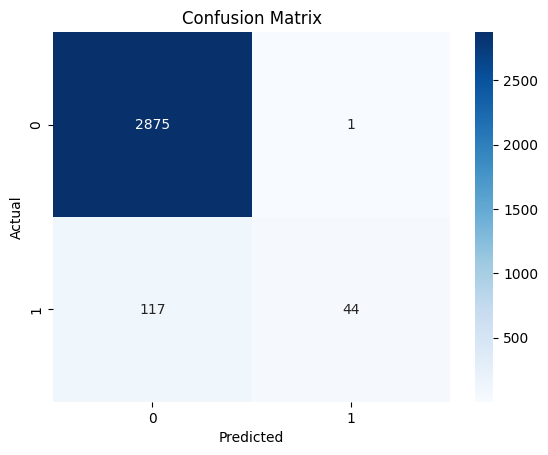

In [62]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("../visuals/confusion_matrix.png")
plt.show()